In [1]:
import warnings

warnings.filterwarnings('ignore')

# 2 geoplot基础

## 2.1 从一个简单的例子出发

In [2]:
import geopandas as gpd

%matplotlib inline

# 读入纽约行政区域面文件
nyc_boroughs = gpd.read_file('geometry/nyc-boroughs.geojson')
nyc_boroughs.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [3]:
# 读入纽约车祸记录点文件
nyc_collision_factors = gpd.read_file('geometry/nyc-collision-factors.geojson')
nyc_collision_factors.head()

,id,ON STREET NAME,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 3,NUMBER OF CYCLIST INJURED,LONGITUDE,OFF STREET NAME,VEHICLE TYPE CODE 4,LATITUDE,LOCATION,...,ZIP CODE,VEHICLE TYPE CODE 3,NUMBER OF CYCLIST KILLED,DATE,UNIQUE KEY,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 5,TIME,NUMBER OF PEDESTRIANS INJURED,geometry
0,18,WORTMAN AVENUE,0,None,0,-73.872007,None,None,40.662514,"(40.6625139, -73.8720068)",...,11208.0,None,0,11/10/2016,3559576,None,None,16:11:00,0,POINT (-73.87201 40.66251)
1,21,HUBERT STREET,0,None,0,-74.008344,None,None,40.721323,"(40.7213228, -74.0083444)",...,10013.0,None,0,11/10/2016,3557391,None,None,05:11:00,1,POINT (-74.00834 40.72132)
2,69,HENRY STREET,0,None,0,-73.997563,None,None,40.687999,"(40.6879989, -73.9975625)",...,11201.0,None,0,04/16/2016,3419378,None,None,09:15:00,0,POINT (-73.99756 40.68800)
3,80,None,0,Failure to Yield Right-of-Way,0,-73.854542,67-64 FLEET STREET,None,40.719228,"(40.7192276, -73.8545422)",...,11375.0,PASSENGER VEHICLE,0,04/15/2016,3428072,None,None,10:20:00,0,POINT (-73.85454 40.71923)
4,85,BEDFORD AVENUE,0,None,0,-73.952731,None,None,40.632147,"(40.6321467, -73.9527315)",...,11210.0,None,0,04/15/2016,3417537,None,None,10:35:00,0,POINT (-73.95273 40.63215)


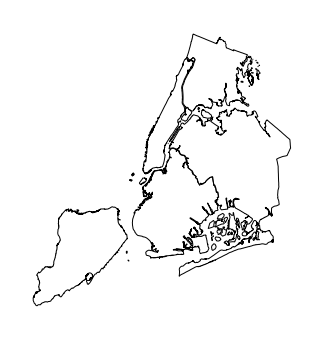

In [4]:
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

ax = gplt.polyplot(df=nyc_boroughs,
                   projection=gcrs.AlbersEqualArea())

plt.savefig("图4.png", bbox_inches='tight', pad_inches=0, dpi=300)

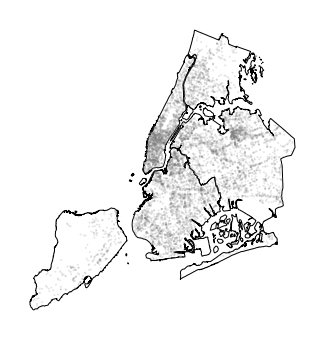

In [5]:
ax = gplt.polyplot(df=nyc_boroughs,
                   projection=gcrs.AlbersEqualArea())

ax = gplt.pointplot(df=nyc_collision_factors,
                    s=2,
                    color='grey',
                    alpha=0.2,
                    linewidth=0, # 设置轮廓粗细为0
                    ax=ax)

plt.savefig("图5.png", bbox_inches='tight', pad_inches=0, dpi=300)

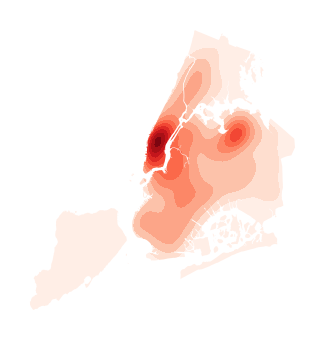

In [6]:
ax = gplt.polyplot(df=nyc_boroughs,
                   projection=gcrs.AlbersEqualArea())

# 叠加核密度图层
ax = gplt.kdeplot(df=nyc_collision_factors,
                  cmap='Reds',
                  shade=True,
                  shade_lowest=True,
                  clip=nyc_boroughs,
                  ax=ax)

plt.savefig("图6.png", bbox_inches='tight', pad_inches=0, dpi=300)

## 2.2 geoplot绘图API

### 2.2.1 Pointplot

In [7]:
boston_zip_codes = gpd.read_file('geometry/boston-zip-codes.geojson')
boston_zip_codes.head()

,id,geometry
0,1923.0,"POLYGON ((-70.93092 42.61228, -70.92964 42.609..."
1,1960.0,"POLYGON ((-71.00276 42.56336, -71.00085 42.562..."
2,1915.0,"MULTIPOLYGON (((-70.90041 42.59089, -70.89301 ..."
3,2539.0,"MULTIPOLYGON (((-70.55722 41.41547, -70.55820 ..."
4,1037.0,"POLYGON ((-72.12925 42.36566, -72.12931 42.365..."


In [8]:
boston_airbnb_listings = gpd.read_file('geometry/boston-airbnb-listings.geojson')
boston_airbnb_listings.head()

,id,zipcode,price,geometry
0,0,2131.0,250.0,POINT (-71.13307 42.28262)
1,1,2131.0,65.0,POINT (-71.13437 42.28624)
2,2,2131.0,65.0,POINT (-71.13577 42.29244)
3,4,2131.0,79.0,POINT (-71.13626 42.28451)
4,5,2131.0,75.0,POINT (-71.13189 42.29169)


- **普通散点分布**

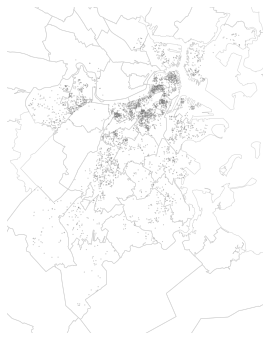

In [9]:
# 简单绘制波士顿行政区划
ax = gplt.polyplot(df=boston_zip_codes,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor='lightgrey',
                   linewidths=0.5)

gplt.pointplot(df=boston_airbnb_listings,
               ax=ax, # 叠加图层
               s=1,
               linewidths=0.1,
               color='grey',
               alpha=0.4)

plt.savefig("图8.png", bbox_inches='tight', pad_inches=0, dpi=300)

- **映射房源价格到色彩上**

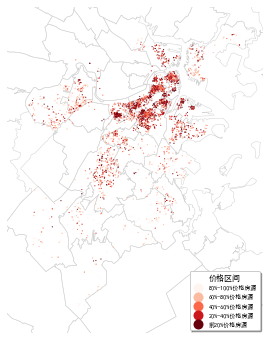

In [10]:
import mapclassify as mc

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 简单绘制波士顿行政区划
ax = gplt.polyplot(df=boston_zip_codes,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor='lightgrey',
                   linewidths=0.5)

scheme = mc.Quantiles(boston_airbnb_listings['price'], k=5)
gplt.pointplot(df=boston_airbnb_listings,
               ax=ax, # 叠加图层
               s=1, # 散点大小
               linewidths=0.1, # 散点轮廓宽度
               hue='price', # 以price作为色彩映射列
               cmap='Reds', # 色彩方案为Reds
               scheme=scheme, # 传入mapclassify对象
               legend=True, # 开启图例
               legend_kwargs={
                   'loc': 'lower right', # 图例位置
                   'title': '价格区间', # 图例标题
                   'title_fontsize': 8, # 图例标题字体大小
                   'fontsize': 6, # 图例非标题外字体大小
                   'shadow': True, # 添加图例阴影
               },
               legend_labels=['80%-100%价格房源',
                              '60%-80%价格房源',
                              '40%-60%价格房源',
                              '20%-40%价格房源',
                              '前20%价格房源'])

plt.savefig("图9.png", bbox_inches='tight', pad_inches=0, dpi=300)

- **映射房源价格到尺寸上**

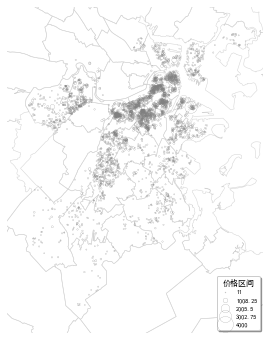

In [11]:
import numpy as np

# 简单绘制波士顿行政区划
ax = gplt.polyplot(df=boston_zip_codes,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor='lightgrey',
                   linewidths=0.5)

ax = gplt.pointplot(df=boston_airbnb_listings,
                    ax=ax, # 叠加图层
                    linewidths=0.2, # 散点轮廓宽度
                    scale='price', # 以price作为色彩映射列
                    color=np.array([0., 0., 0., 0.]), # 设置填充色为透明
                    edgecolor='grey', # 设置轮廓颜色
                    limits=(1, 16), # 设置散点的尺寸范围
                    legend=True, # 开启图例
                    legend_kwargs={
                        'loc': 'lower right', # 图例位置
                        'title': '价格区间', # 图例标题
                        'title_fontsize': 8, # 图例标题字体大小
                        'fontsize': 6, # 图例非标题外字体大小
                        'shadow': True, # 添加图例阴影
                        'markeredgecolor': 'grey', # 图例标记的轮廓色彩
                        'markeredgewidth': 0.2 # 图例标记的轮廓粗细
                    })

plt.savefig("图10.png", bbox_inches='tight', pad_inches=0, dpi=300)

- **同时映射颜色与尺寸**

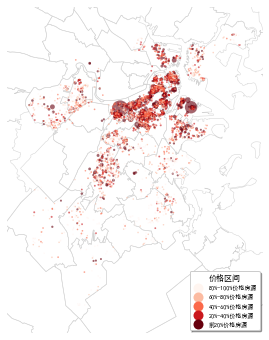

In [12]:
# 简单绘制波士顿行政区划
ax = gplt.polyplot(df=boston_zip_codes,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor='lightgrey',
                   linewidths=0.5)

scheme = mc.Quantiles(boston_airbnb_listings['price'], k=5)
gplt.pointplot(df=boston_airbnb_listings,
               ax=ax, # 叠加图层
               scale='price', # 以price作为尺寸映射列
               limits=(1, 16), # 设置散点的尺寸范围
               alpha=0.6, # 设置散点透明度
               linewidths=0.1, # 散点轮廓宽度
               hue='price', # 以price作为色彩映射列
               cmap='Reds', # 色彩方案为Reds
               scheme=scheme, # 传入mapclassify对象
               legend=True, # 开启图例
               legend_kwargs={
                   'loc': 'lower right', # 图例位置
                   'title': '价格区间', # 图例标题
                   'title_fontsize': 8, # 图例标题字体大小
                   'fontsize': 6, # 图例非标题外字体大小
                   'shadow': True, # 添加图例阴影
               },
               legend_labels=['80%-100%价格房源',
                              '60%-80%价格房源',
                              '40%-60%价格房源',
                              '20%-40%价格房源',
                              '前20%价格房源'])

plt.savefig("图11.png", bbox_inches='tight', pad_inches=0, dpi=300)

### 2.2.2 Polyplot

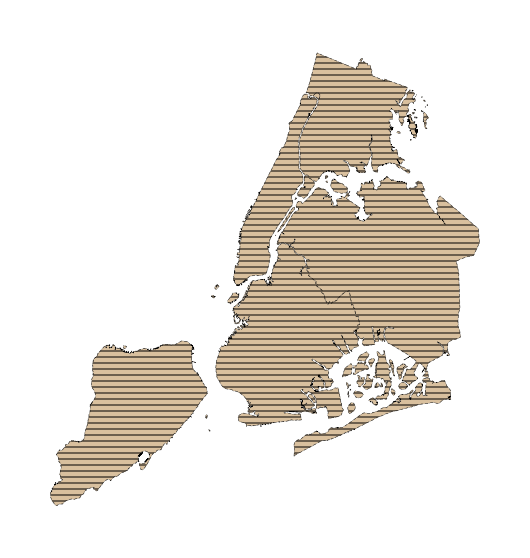

In [13]:
gplt.polyplot(df=nyc_boroughs,
              projection=gcrs.AlbersEqualArea(),
              figsize=(10, 10),
              linewidths=0.5,
              linestyle='-.',
              edgecolors='grey',
              facecolor='#d9c09e',
              hatch='--')

plt.savefig("图12.png", bbox_inches='tight', pad_inches=0, dpi=300)

### 2.2.3 Webmap

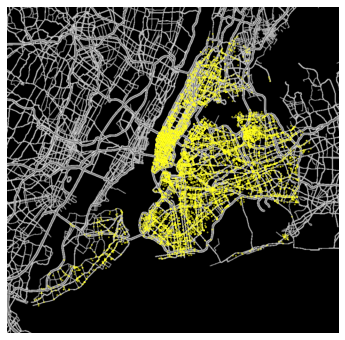

In [14]:
ax = gplt.webmap(df=nyc_boroughs,
                 provider='ST_TERRAIN_LINES',
                 zoom=11)

ax = gplt.pointplot(df=nyc_collision_factors,
                    color='lightyellow',
                    edgecolor='yellow',
                    alpha=0.4,
                    s=1,
                    ax=ax)

plt.savefig("图13.png", bbox_inches='tight', pad_inches=0, dpi=300)

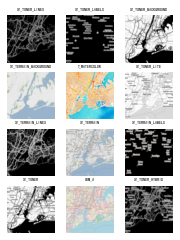

In [16]:
import tree
from tqdm.notebook import tqdm
import contextily as ctx

f, axarr = plt.subplots(4, 3, subplot_kw={'projection': gcrs.WebMercator()}, figsize=(3, 4))

axarr = tree.flatten(axarr.tolist())

providers = list(ctx.tile_providers.deprecated_sources)
providers.remove('OSM_B')
providers.remove('OSM_C')

for idx, provider in tqdm(enumerate(list(providers))):
    
    if provider in ['OSM_B', 'OSM_C']:
        pass
    
    else:
        axarr[idx] = gplt.webmap(df=nyc_boroughs,
                                 provider=provider,
                                 zoom=10,
                                 ax=axarr[idx])
        axarr[idx].set_title(provider, fontsize=4)

# plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("图14.png", bbox_inches='tight', pad_inches=0, dpi=300)

## 2.3 在模仿中学习

In [17]:
import pandas as pd
from shapely.geometry import Point, MultiPolygon, MultiLineString, GeometryCollection, Polygon

In [18]:
# 读入原始充电桩数据
raw = pd.read_excel('Berlin/ladesaeulen_bnetza_und_be_emobil.xlsx')
raw.head()

,id,quelle,p1_kw,steckertyp_2,p2_kw,steckertyp_3,p3_kw,steckertyp_4,p4_kw,inbetrieb_am,x_wert,y_wert,betreiber,ladeeinr_art,plz_ort,adresse,ladeart,bemerkungen,anschlussltg_kw,steckertyp_1
0,1,bnetza,11.0,AC Steckdose Typ 2,11.0,NaN,NaN,NaN,NaN,2017-03-21T00:00:00,391281.155530,5.821719e+06,Allego GmbH,Normalladeeinrichtung,10115 Berlin,Anklamer Str. 12,NaN,NaN,22.0,AC Steckdose Typ 2
1,2,bnetza,11.0,AC Steckdose Typ 2,11.0,NaN,NaN,NaN,NaN,2017-03-21T00:00:00,391281.155530,5.821719e+06,Allego GmbH,Normalladeeinrichtung,10115 Berlin,Anklamer Str. 12,NaN,NaN,22.0,AC Steckdose Typ 2
2,3,bnetza,11.0,AC Steckdose Typ 2,11.0,NaN,NaN,NaN,NaN,2017-03-13T00:00:00,390867.934871,5.820993e+06,Allego GmbH,Normalladeeinrichtung,10115 Berlin,Borsigstr. 1,NaN,NaN,22.0,AC Steckdose Typ 2
3,4,bnetza,11.0,AC Steckdose Typ 2,11.0,NaN,NaN,NaN,NaN,2017-01-26T00:00:00,389462.092938,5.821715e+06,Allego GmbH,Normalladeeinrichtung,10115 Berlin,Kieler Str. 5,NaN,NaN,22.0,AC Steckdose Typ 2
4,5,bnetza,11.0,AC Steckdose Typ 2,11.0,NaN,NaN,NaN,NaN,2016-12-21T00:00:00,389951.272121,5.821431e+06,Allego GmbH,Normalladeeinrichtung,10115 Berlin,Habersaathstr. 34,NaN,NaN,22.0,AC Steckdose Typ 2


In [19]:
# 对充电桩进行矢量化，初始投影为EPSG：25833
df_emobil = gpd.GeoDataFrame({'geometry': [Point(x, y) for x, y in zip(raw['x_wert'], raw['y_wert'])]}, 
                             crs='EPSG:25833')

# 转为WGS84地理坐标系以方便
df_emobil.to_crs('EPSG:4326', inplace=True)

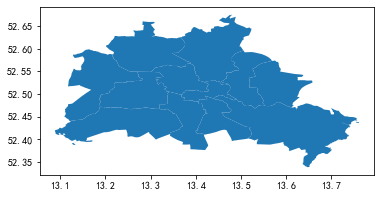

In [20]:
# 读入柏林行政区划面数据
berlin_area = gpd.read_file('Berlin/Bezirke__Berlin.shp')
berlin_area.plot()

In [21]:
# 读入柏林OSM路网线数据
berlin_roads = gpd.read_file('Berlin/gis_osm_roads_free_1.shp')

# 保留主要道路
berlin_roads = berlin_roads.query('fclass not in ["bridleway", "footway", "path", "pedestrian", "steps", "cycleway"]')

In [22]:
# 进行空间叠置获取行政区划内部的所有道路线要素
intersect_roads = gpd.GeoSeries([element for element in MultiLineString(berlin_roads.geometry.tolist()).intersection(GeometryCollection(berlin_area.geometry.tolist())) 
                                  if element.geom_type !=  'Point'],
                                crs='EPSG:4326').to_crs('EPSG:3857')

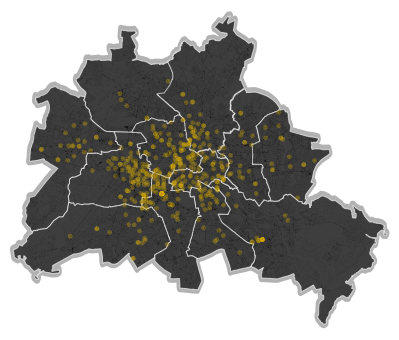

In [23]:
# 绘制最底层柏林缓冲区
ax = gplt.polyplot(df=gpd.GeoSeries([GeometryCollection(berlin_area.geometry.tolist())], crs='EPSG:4326') \
                         .buffer(0.005, resolution=100),
                   projection=gcrs.WebMercator(),
                   facecolor='grey',
                   edgecolor='None',
                   alpha=0.6)

# 绘制柏林区划
ax = gplt.polyplot(df=berlin_area,
                   facecolor='black',
                   edgecolor='white',
                   alpha=0.65,
                   ax=ax)

# 利用geopandas绘制内部OSM路网
ax = intersect_roads.plot(ax=ax, 
                          linewidth=0.1,
                          edgecolor='black',
                          alpha=0.25)

# 绘制充电桩散点
ax = gplt.pointplot(df=df_emobil,
                    ax=ax,
                    extent=berlin_area.total_bounds,
                    color='#edc00d',
                    alpha=0.3,
                    linewidth=0.2,
                    s=4.5)

# 绘制充电桩中心点
ax = gplt.pointplot(df=df_emobil,
                    ax=ax,
                    extent=berlin_area.buffer(0.01).total_bounds,
                    color='#d29c14',
                    edgecolor='#6f603e',
                    linewidth=0.01,
                    s=0.7)

plt.savefig("图16.png", bbox_inches='tight', pad_inches=0, dpi=600)